In [1]:
import scipy.stats as st
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import figure
figure(figsize=(100, 100))

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

In [797]:
def get_distibution(array:float, steps:int) -> (list,list):
    min_value = min(array)
    max_value = max(array)
    h = int((max_value - min_value)/steps  + 1)
    distibution = [0 for i in range(h + 1)]
    for i in array:
        distibution[int((i - min_value) // steps)]+=1;
    sum_ = sum(distibution)
    for i in range(len(distibution)):
        distibution[i] = distibution[i]/sum_
    step_list = []
    for i in range(h + 1):
        step_list.append(min_value + steps * i)
    for i in range(len(distibution) - 1):
        distibution[i]/= step_list[i + 1] - step_list[i]
    return distibution,step_list

def get_distribution_density(min_, max_, func):
    ar = np.linspace(min_, max_, 100000)
    return func(ar), ar


In [798]:
width = 0.2
val = st.norm(scale=1).rvs(size=10)
x,y = get_distibution(val,width)
y_dens,x_dens = get_distribution_density(min(val), max(val),st.norm(scale=1).pdf)

In [799]:
def draw(title:str,func,n,width=0.2):
    
    plt.figure(figsize=(30,6))

    plt.suptitle(title)
    for i in range(len(n)):
        
        val = func.rvs(size=n[i])
        x,y = get_distibution(val,width)
        y_dens,x_dens = get_distribution_density(min(val), max(val),func.pdf)
        
        plt.subplot(1,len(n),i + 1)
        plt.bar(y,x,align='edge',width=width,edgecolor = 'darkblue',linewidth = 5)  # density=False would make counts
        plt.plot(x_dens, y_dens, color="red")
        plt.ylabel('Density')
        plt.xlabel('NormalData');
        plt.title("n = "+ str(n[i]))
    plt.show()


In [800]:
def draw_poisson(title:str,func,n,width=1):
    mu = 10
    plt.figure(figsize=(30,6))

    plt.suptitle(title)
    for i in range(len(n)):
        
        val = func.rvs(mu=mu,size=n[i])
        x,y = get_distibution(val,width)
        
        x_dens = np.linspace(min(val),max(val) + 1,100000)
        y_dens = func.pmf(mu,x_dens)
        
        
        plt.subplot(1,len(n),i + 1)
        plt.bar(y,x,align='edge',width=width,edgecolor = 'darkblue',linewidth = 5)  # density=False would make counts
        plt.plot(x_dens, y_dens, color="red")
        plt.ylabel('Density')
        plt.xlabel('NormalData');
        plt.title("n = "+ str(n[i]))
    plt.show()

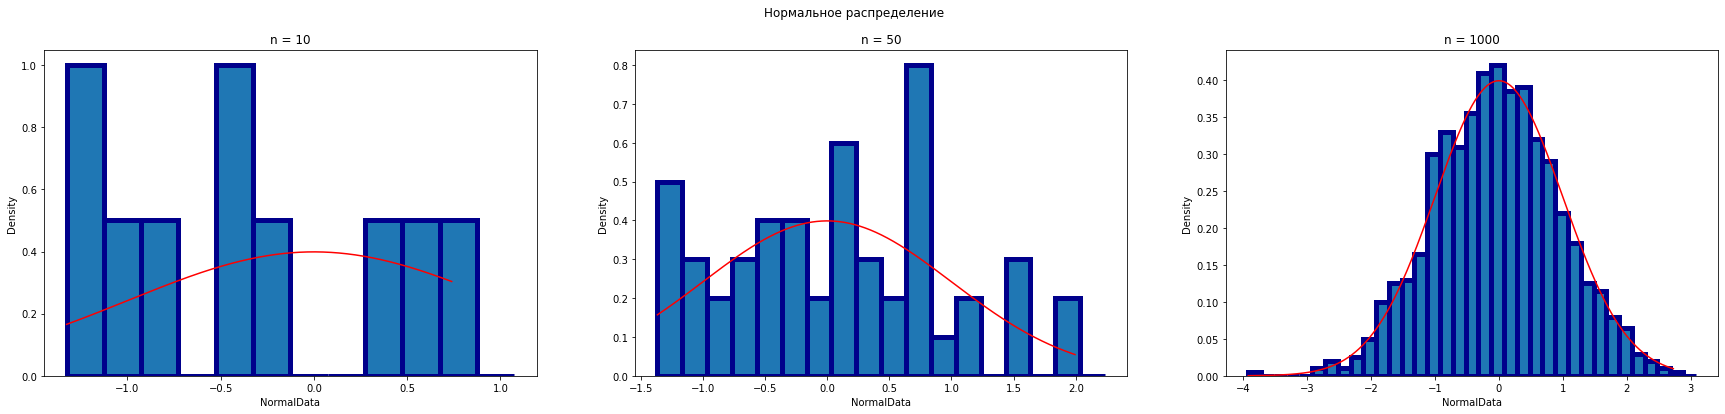

In [801]:
draw("Нормальное распределение",st.norm,n=[10,50,1000])

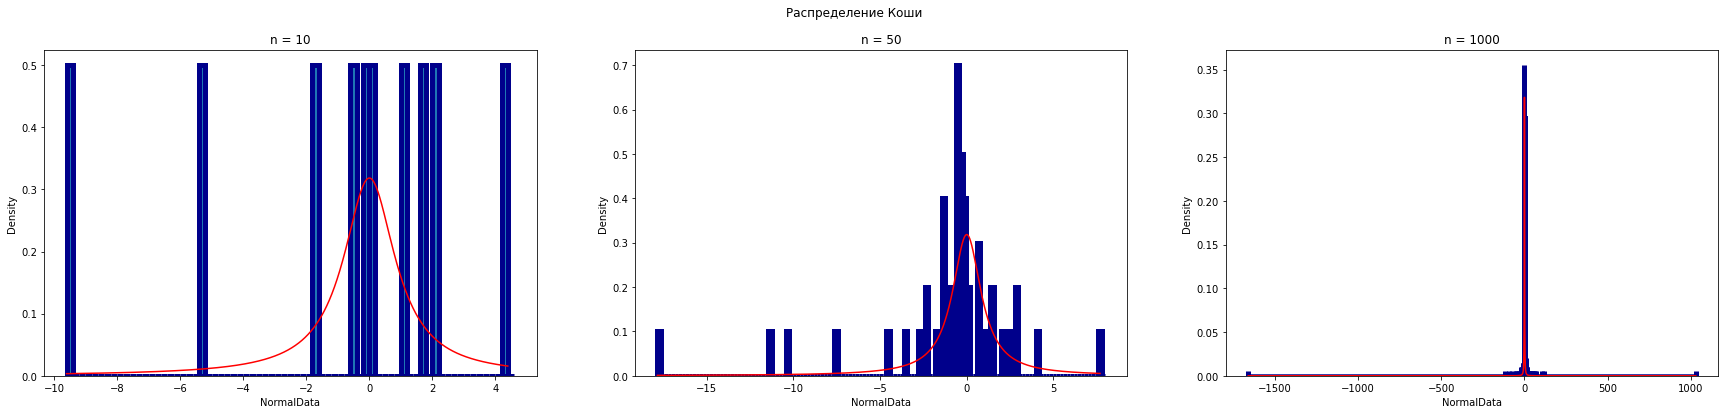

In [802]:
draw("Распределение Коши",st.cauchy,n=[10,50,1000])

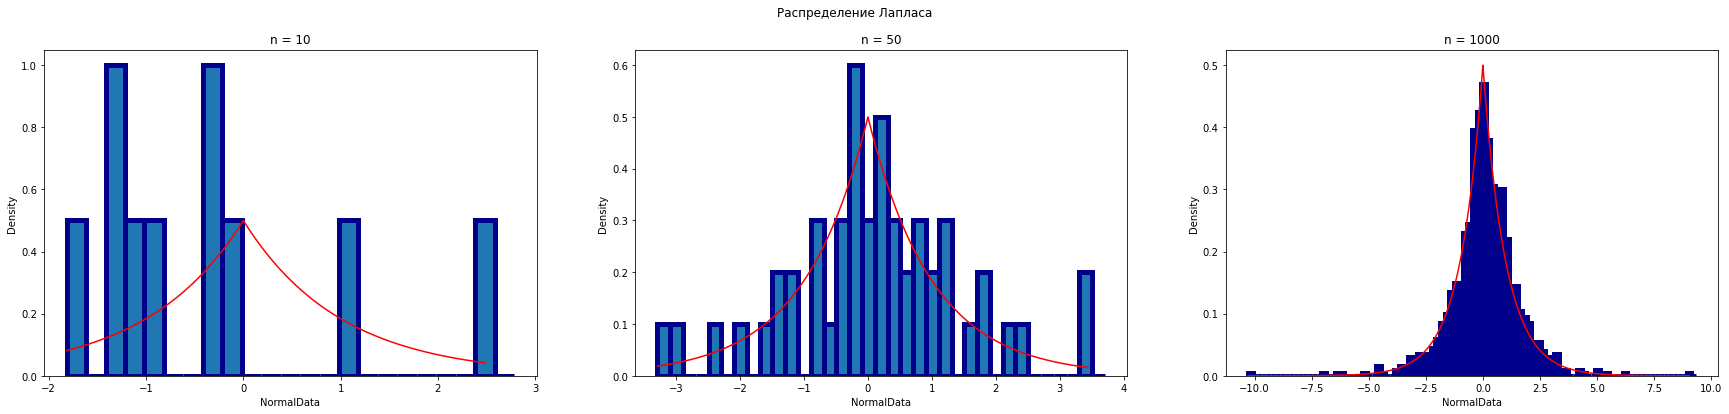

In [786]:
draw("Распределение Лапласа",st.laplace,n=[10,50,1000])

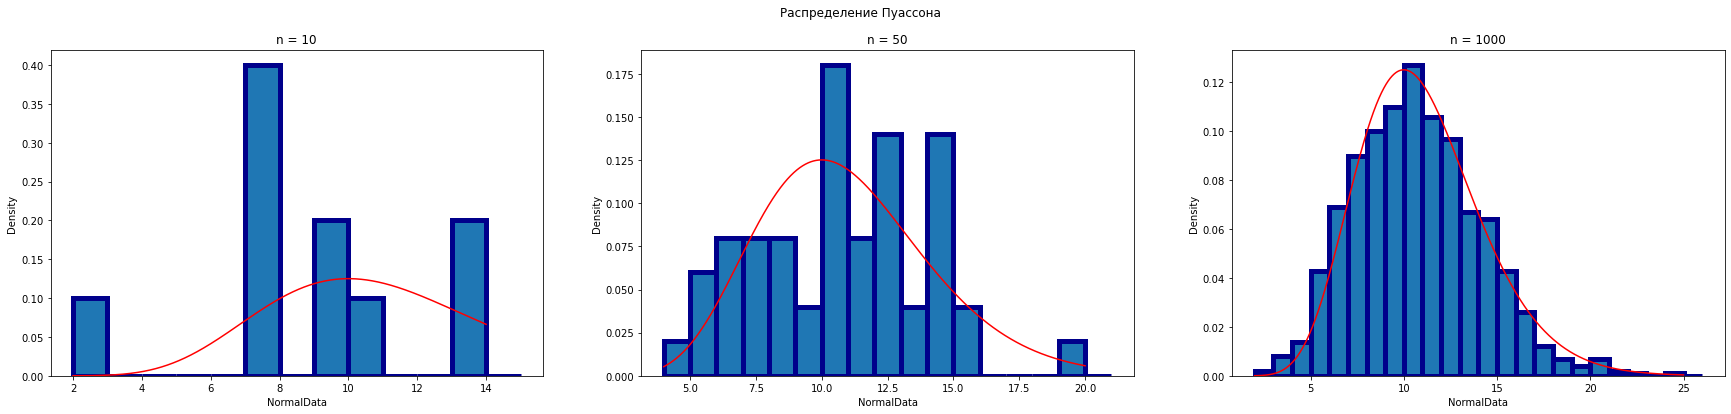

In [789]:
draw_poisson ("Распределение Пуассона", st.poisson, n=[10,50,1000])

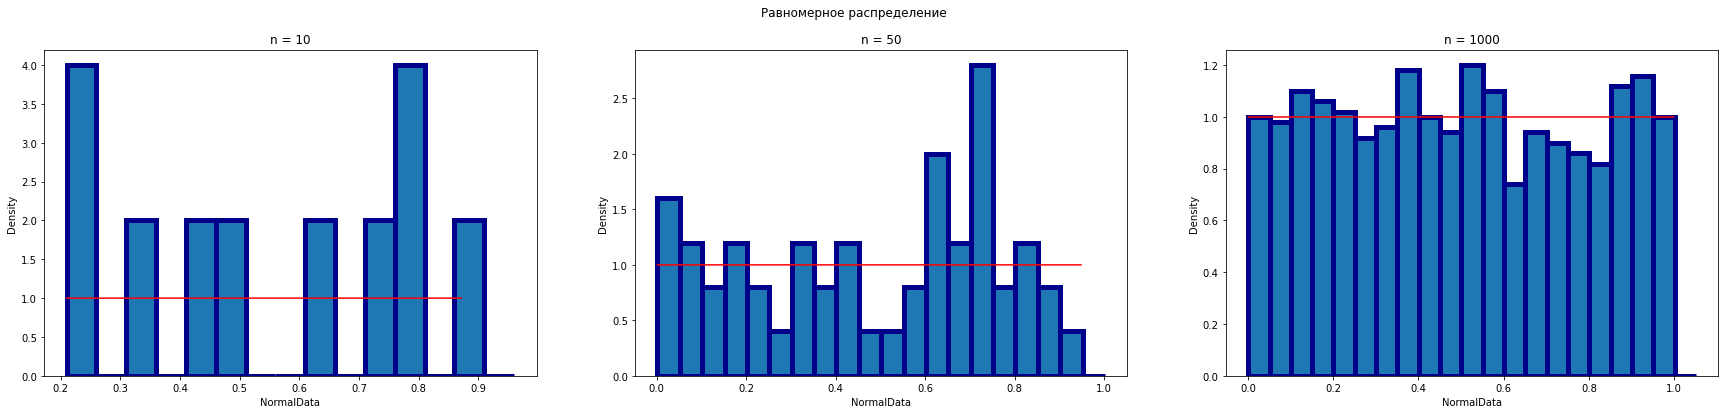

In [795]:
draw ("Равномерное распределение", st.uniform, n=[10,50,1000],width=0.05)